In [69]:
print('Hello')

Hello


In [70]:
import numpy as np

In [71]:
import sklearn
print(sklearn.__version__)

1.7.2


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))
print(clf.score(X,y))

[1]
0.946


In [91]:
import csv

with open("conn.log.labeled", "r") as file:
    with open("dataset.csv", "w", newline="") as output:
        csv_writer = csv.writer(output)
        for line in file:
            stripped_line = line.strip()
            if line.startswith("#fields"):
                line = line.split("\t")[1:]
                csv_writer.writerow(line)
            elif not line.startswith("#"):
                line = line.split("\t")
                csv_writer.writerow(line)

In [100]:
import pandas as pd

df = pd.read_csv("dataset.csv")

df = df.rename(columns={df.columns[-1] : 'label'})

df['label'].loc[df['label'].str.contains("malicious", case=False, na=False)] = "Malicious"
df['label'].loc[df['label'].str.contains("benign", case=False, na=False)] = "Benign"

benign_counts = df['label'].value_counts()['Benign']
malicious_counts = df['label'].value_counts()['Malicious']
print(benign_counts)
print(malicious_counts)

df.head()

C:\Users\pwmou\AppData\Local\Temp\ipykernel_31572\977174386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'].loc[df['label'].str.contains("malicious", case=False, na=False)] = "Malicious"
C:\Users\pwmou\AppData\Local\Temp\ipykernel_31572\977174386.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'].loc[df['label'].str.contains("benign", case=False, na=False)] = "Benign"


469275
539473


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524,65.127.233.163,23,tcp,-,2.999051,0,...,S0,-,-,0,S,3,180,0,0,Malicious
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305,63.150.16.171,23,tcp,-,-,-,...,S0,-,-,0,S,1,60,0,0,Malicious
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101,111.40.23.49,23,tcp,-,-,-,...,S0,-,-,0,S,1,60,0,0,Malicious
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905,131.174.215.147,23,tcp,-,2.998796,0,...,S0,-,-,0,S,3,180,0,0,Malicious
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301,91.42.47.63,23,tcp,-,-,-,...,S0,-,-,0,S,1,60,0,0,Malicious


In [93]:
labels = df['label']
labels.head()

0    Malicious
1    Malicious
2    Malicious
3    Malicious
4    Malicious
Name: label, dtype: object

In [94]:
df.value_counts("label")

label
Malicious    539473
Benign       469275
Name: count, dtype: int64

In [95]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524,65.127.233.163,23,tcp,-,2.999051,0,...,S0,-,-,0,S,3,180,0,0,Malicious
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305,63.150.16.171,23,tcp,-,-,-,...,S0,-,-,0,S,1,60,0,0,Malicious
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101,111.40.23.49,23,tcp,-,-,-,...,S0,-,-,0,S,1,60,0,0,Malicious
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905,131.174.215.147,23,tcp,-,2.998796,0,...,S0,-,-,0,S,3,180,0,0,Malicious
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301,91.42.47.63,23,tcp,-,-,-,...,S0,-,-,0,S,1,60,0,0,Malicious


In [96]:
df["proto"] = df["proto"].astype("category").cat.codes
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524,65.127.233.163,23,1,-,2.999051,0,...,S0,-,-,0,S,3,180,0,0,Malicious
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305,63.150.16.171,23,1,-,-,-,...,S0,-,-,0,S,1,60,0,0,Malicious
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101,111.40.23.49,23,1,-,-,-,...,S0,-,-,0,S,1,60,0,0,Malicious
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905,131.174.215.147,23,1,-,2.998796,0,...,S0,-,-,0,S,3,180,0,0,Malicious
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301,91.42.47.63,23,1,-,-,-,...,S0,-,-,0,S,1,60,0,0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,1.526283e+09,CUyBg1WA04SBmf3ah,192.168.100.103,43763,16.219.83.137,64906,2,-,-,-,...,S0,-,-,0,D,1,40,0,0,Benign
1008744,1.526283e+09,CvaIoX2b9VynuYieBf,192.168.100.103,43763,100.57.245.196,39435,2,-,-,-,...,S0,-,-,0,D,1,40,0,0,Benign
1008745,1.526283e+09,CVHrUzIUN0mW5lQsl,192.168.100.103,43763,249.99.119.9,26169,2,-,-,-,...,S0,-,-,0,D,1,40,0,0,Benign
1008746,1.526283e+09,CkGlnL2pxzlusrFlLj,192.168.100.103,43763,205.103.167.192,18241,2,-,-,-,...,S0,-,-,0,D,1,40,0,0,Benign


In [97]:
df["service"] = df["service"].astype("category").cat.codes
df["history"] = df["history"].astype("category").cat.codes
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524,65.127.233.163,23,1,0,2.999051,0,...,S0,-,-,0,22,3,180,0,0,Malicious
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305,63.150.16.171,23,1,0,-,-,...,S0,-,-,0,22,1,60,0,0,Malicious
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101,111.40.23.49,23,1,0,-,-,...,S0,-,-,0,22,1,60,0,0,Malicious
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905,131.174.215.147,23,1,0,2.998796,0,...,S0,-,-,0,22,3,180,0,0,Malicious
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301,91.42.47.63,23,1,0,-,-,...,S0,-,-,0,22,1,60,0,0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,1.526283e+09,CUyBg1WA04SBmf3ah,192.168.100.103,43763,16.219.83.137,64906,2,0,-,-,...,S0,-,-,0,2,1,40,0,0,Benign
1008744,1.526283e+09,CvaIoX2b9VynuYieBf,192.168.100.103,43763,100.57.245.196,39435,2,0,-,-,...,S0,-,-,0,2,1,40,0,0,Benign
1008745,1.526283e+09,CVHrUzIUN0mW5lQsl,192.168.100.103,43763,249.99.119.9,26169,2,0,-,-,...,S0,-,-,0,2,1,40,0,0,Benign
1008746,1.526283e+09,CkGlnL2pxzlusrFlLj,192.168.100.103,43763,205.103.167.192,18241,2,0,-,-,...,S0,-,-,0,2,1,40,0,0,Benign


In [101]:
df['duration'] = df['duration'].replace("-", np.nan)
df['orig_bytes'] = df['orig_bytes'].replace("-", np.nan)
df['resp_bytes'] = df['resp_bytes'].replace("-", np.nan)
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524,65.127.233.163,23,tcp,-,2.999051,0,...,S0,-,-,0,S,3,180,0,0,Malicious
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305,63.150.16.171,23,tcp,-,NaN,NaN,...,S0,-,-,0,S,1,60,0,0,Malicious
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101,111.40.23.49,23,tcp,-,NaN,NaN,...,S0,-,-,0,S,1,60,0,0,Malicious
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905,131.174.215.147,23,tcp,-,2.998796,0,...,S0,-,-,0,S,3,180,0,0,Malicious
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301,91.42.47.63,23,tcp,-,NaN,NaN,...,S0,-,-,0,S,1,60,0,0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,1.526283e+09,CUyBg1WA04SBmf3ah,192.168.100.103,43763,16.219.83.137,64906,udp,-,NaN,NaN,...,S0,-,-,0,D,1,40,0,0,Benign
1008744,1.526283e+09,CvaIoX2b9VynuYieBf,192.168.100.103,43763,100.57.245.196,39435,udp,-,NaN,NaN,...,S0,-,-,0,D,1,40,0,0,Benign
1008745,1.526283e+09,CVHrUzIUN0mW5lQsl,192.168.100.103,43763,249.99.119.9,26169,udp,-,NaN,NaN,...,S0,-,-,0,D,1,40,0,0,Benign
1008746,1.526283e+09,CkGlnL2pxzlusrFlLj,192.168.100.103,43763,205.103.167.192,18241,udp,-,NaN,NaN,...,S0,-,-,0,D,1,40,0,0,Benign


In [81]:
df.columns[df.isna().any()]

Index(['duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp'], dtype='object')

In [82]:
df = df.drop(["local_orig", "local_resp", "ts", "uid"], axis=1)
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.100.103,51524,65.127.233.163,23,1,0,2.999051,0,0,S0,0,22,3,180,0,0,Malicious
1,192.168.100.103,56305,63.150.16.171,23,1,0,NaN,NaN,NaN,S0,0,22,1,60,0,0,Malicious
2,192.168.100.103,41101,111.40.23.49,23,1,0,NaN,NaN,NaN,S0,0,22,1,60,0,0,Malicious
3,192.168.100.103,60905,131.174.215.147,23,1,0,2.998796,0,0,S0,0,22,3,180,0,0,Malicious
4,192.168.100.103,44301,91.42.47.63,23,1,0,NaN,NaN,NaN,S0,0,22,1,60,0,0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,192.168.100.103,43763,16.219.83.137,64906,2,0,NaN,NaN,NaN,S0,0,2,1,40,0,0,Benign
1008744,192.168.100.103,43763,100.57.245.196,39435,2,0,NaN,NaN,NaN,S0,0,2,1,40,0,0,Benign
1008745,192.168.100.103,43763,249.99.119.9,26169,2,0,NaN,NaN,NaN,S0,0,2,1,40,0,0,Benign
1008746,192.168.100.103,43763,205.103.167.192,18241,2,0,NaN,NaN,NaN,S0,0,2,1,40,0,0,Benign


In [83]:
df["duration"] = df["duration"].fillna(0)
df["orig_bytes"] = df["orig_bytes"].fillna(0)
df["resp_bytes"] = df["resp_bytes"].fillna(0)

In [84]:
df["id.orig_h"] = df["id.orig_h"].str.replace('.','')
pd.to_numeric(df["id.orig_h"], downcast="integer")

df["id.resp_h"] = df["id.resp_h"].str.replace('.','')
pd.to_numeric(df["id.resp_h"], downcast="integer")

0           65127233163
1            6315016171
2             111402349
3          131174215147
4              91424763
               ...     
1008743      1621983137
1008744     10057245196
1008745       249991199
1008746    205103167192
1008747      2370168160
Name: id.resp_h, Length: 1008748, dtype: int64

In [85]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192168100103,51524,65127233163,23,1,0,2.999051,0,0,S0,0,22,3,180,0,0,Malicious
1,192168100103,56305,6315016171,23,1,0,0,0,0,S0,0,22,1,60,0,0,Malicious
2,192168100103,41101,111402349,23,1,0,0,0,0,S0,0,22,1,60,0,0,Malicious
3,192168100103,60905,131174215147,23,1,0,2.998796,0,0,S0,0,22,3,180,0,0,Malicious
4,192168100103,44301,91424763,23,1,0,0,0,0,S0,0,22,1,60,0,0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,192168100103,43763,1621983137,64906,2,0,0,0,0,S0,0,2,1,40,0,0,Benign
1008744,192168100103,43763,10057245196,39435,2,0,0,0,0,S0,0,2,1,40,0,0,Benign
1008745,192168100103,43763,249991199,26169,2,0,0,0,0,S0,0,2,1,40,0,0,Benign
1008746,192168100103,43763,205103167192,18241,2,0,0,0,0,S0,0,2,1,40,0,0,Benign


In [107]:
df = pd.read_csv("dataset.csv")
labels = df['label']
df = df.drop(['label'], axis=1)
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,192168100103,51524,65127233163,23,1,0,2.999051,0,0,6,0,22,3,180,0,0
1,192168100103,56305,6315016171,23,1,0,0.000000,0,0,6,0,22,1,60,0,0
2,192168100103,41101,111402349,23,1,0,0.000000,0,0,6,0,22,1,60,0,0
3,192168100103,60905,131174215147,23,1,0,2.998796,0,0,6,0,22,3,180,0,0
4,192168100103,44301,91424763,23,1,0,0.000000,0,0,6,0,22,1,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,192168100103,43763,1621983137,64906,2,0,0.000000,0,0,6,0,2,1,40,0,0
1008744,192168100103,43763,10057245196,39435,2,0,0.000000,0,0,6,0,2,1,40,0,0
1008745,192168100103,43763,249991199,26169,2,0,0.000000,0,0,6,0,2,1,40,0,0
1008746,192168100103,43763,205103167192,18241,2,0,0.000000,0,0,6,0,2,1,40,0,0


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.33, random_state=42)

In [109]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))




0.9934542352209609


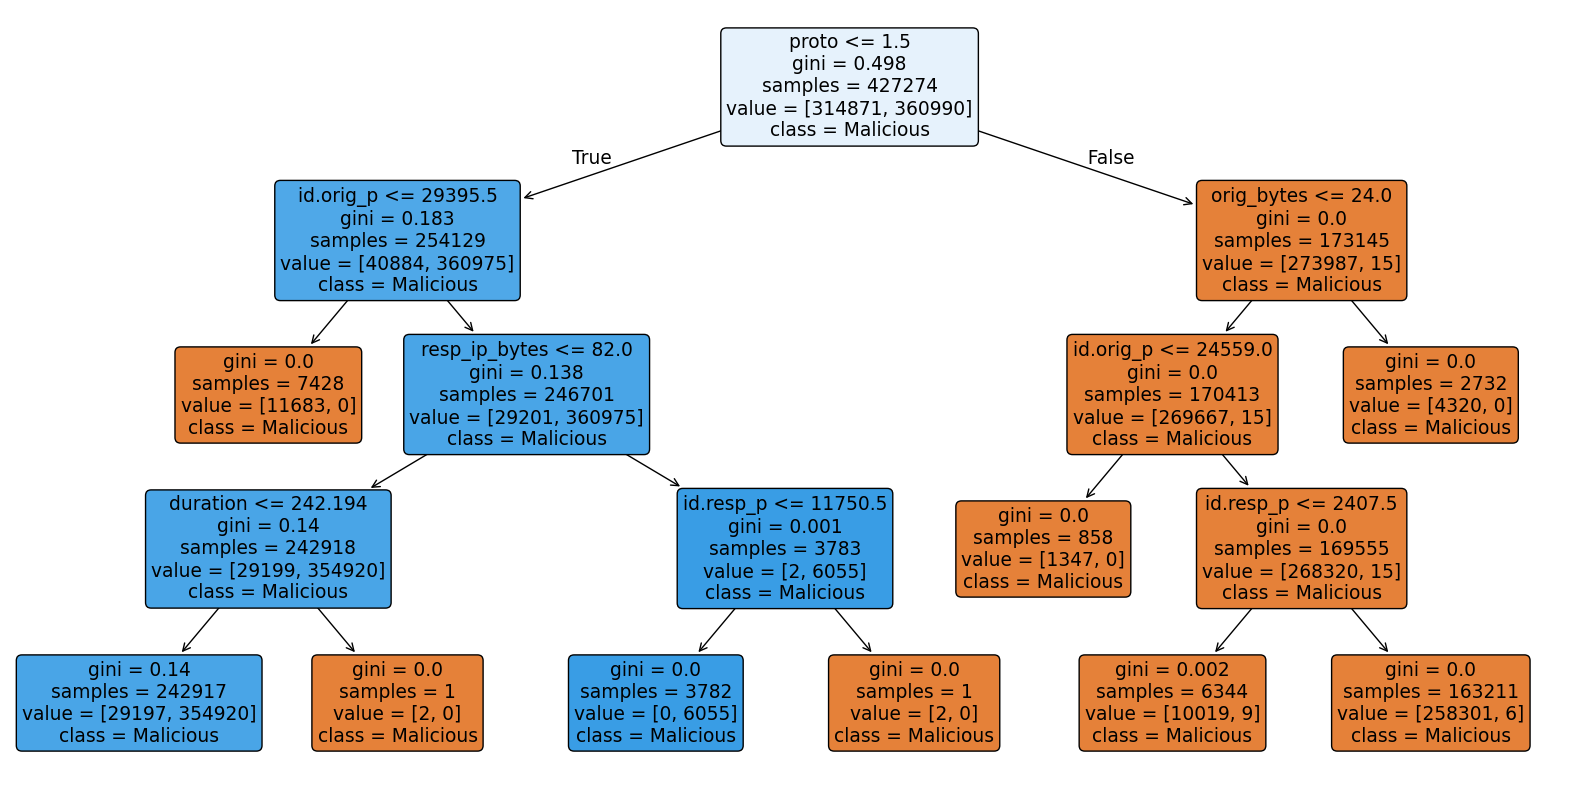

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [120]:
from sklearn import tree
import graphviz

tree_test = clf.estimators_[0]

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_test,
            feature_names=df.columns,
            class_names=labels,
            filled=True, rounded=True)
plt.show()

dot_file=tree.export_graphviz(tree_test, out_file=None, feature_names=df.columns, class_names=labels, label="all")

graphiz_tree = graphviz.Source(dot_file)
graphiz_tree.render("tree",format="png",  cleanup=True)